<a href="https://colab.research.google.com/github/Jeferson-Peter/linearRegressionTeslaStocks/blob/master/MathLinearRegressionAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from   sklearn.linear_model import LinearRegression
from   sklearn.metrics import r2_score
import statsmodels.api as sm


sns.set(style="ticks", color_codes=True)

path = "https://raw.githubusercontent.com/Jeferson-Peter/linearRegressionTeslaStocks/master/teslaCsv1.csv~"

In [ ]:
dados = pd.read_csv(path, sep=";")
dados.head()



,Date,price,Open,Close,High,Low,Volume
0,02/01/2014 16:00,"30,02","29,96","30,02","30,5","29,31",6195355
1,03/01/2014 16:00,"29,91",30,"29,91","30,44","29,72",4698839
2,06/01/2014 16:00,"29,4",30,"29,4","30,08","29,05",5367320
3,07/01/2014 16:00,"29,87","29,52","29,87","30,08","29,05",5041806
4,08/01/2014 16:00,"30,26","29,77","30,26","30,74","29,75",6166674


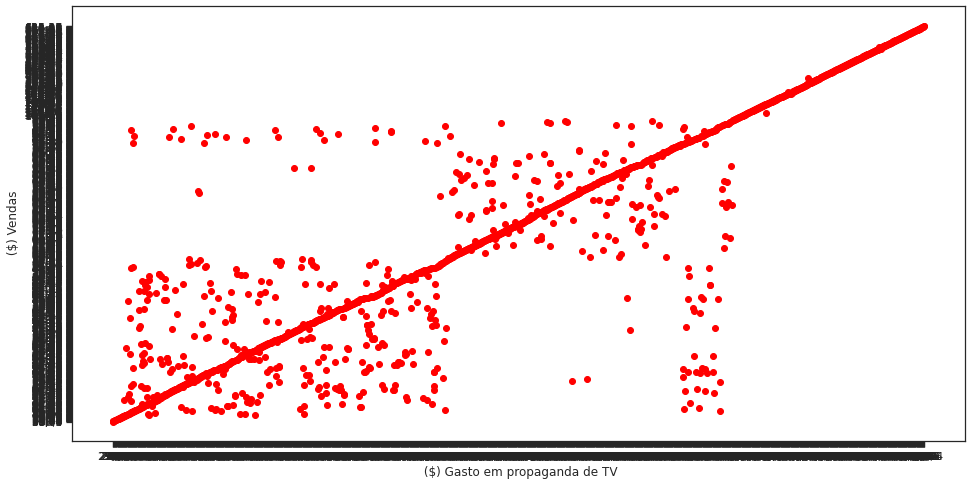

In [ ]:
plt.figure(figsize = (16,8))
plt.scatter(
    dados['Open'],
    dados['High'],
    c='red')
plt.xlabel(" ($) Gasto em propaganda de TV")
plt.ylabel(" ($) Vendas")
plt.show()

In [ ]:
dados['Open'] = pd.to_numeric(dados['Open'], errors='coerce')
dados['Close'] = pd.to_numeric(dados['Close'], errors='coerce')
dados['High'] = pd.to_numeric(dados['High'], errors='coerce')
dados['Low'] = pd.to_numeric(dados['Low'], errors='coerce')
dados['Volume'] = pd.to_numeric(dados['Volume'], errors='coerce')
dados['price'] = pd.to_numeric(dados['price'], errors='coerce')
dados['Open'] = dados['Open'].fillna(0)
dados['Close'] = dados['Close'].fillna(0)
dados['High'] = dados['High'].fillna(0)
dados['Low'] = dados['Low'].fillna(0)
dados['Volume'] = dados['Volume'].fillna(0)
dados['price'] = dados['price'].fillna(0)

dados.info()

In [ ]:
#REGRESSÃO LINEAR SIMPLES

X = dados['Open'].values.reshape(-1,1)
y = dados['High'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)

print("O modelo é: Vendas = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

#REGRESSÃO LINEAR SIMPLES

O modelo é: Vendas = 4.5366 + -0.0080311X


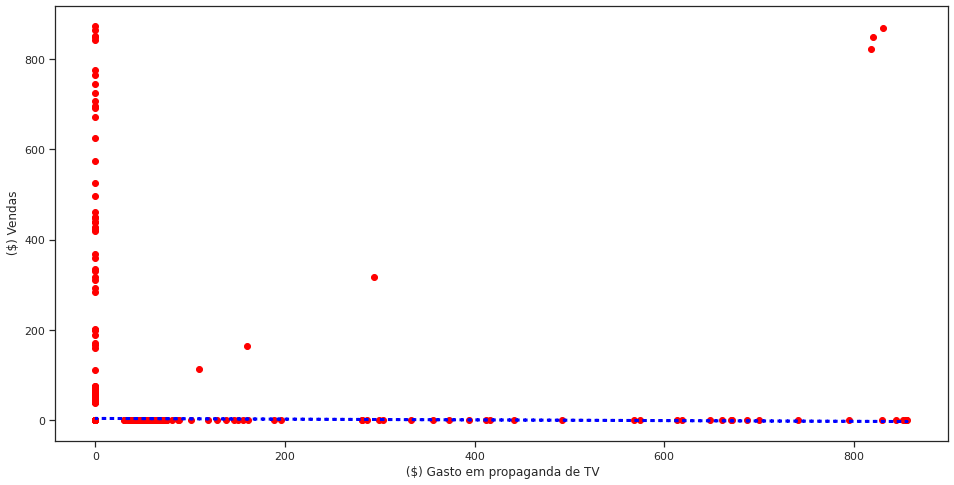

In [ ]:
f_previsoes = reg.predict(X)

plt.figure(figsize = (16,8))
plt.scatter(
    dados['Open'], 
    dados['High'], 
    c='red')


plt.plot(
    dados['Open'],
    f_previsoes,
    c='blue',
    linewidth=3,
    linestyle=':'
)

plt.xlabel(" ($) Gasto em propaganda de TV")
plt.ylabel(" ($) Vendas")
plt.show()


In [ ]:
X = dados['Open']
y = dados['High']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   High   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     32.69
Date:                Thu, 03 Jun 2021   Prob (F-statistic):           1.26e-08
Time:                        23:51:57   Log-Likelihood:                -10938.
No. Observations:                1865   AIC:                         2.188e+04
Df Residuals:                    1863   BIC:                         2.189e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9089      2.003      5.945      0.000       7.980      15.838
Open           0.1289      0.023      5.717      0.000       0.085       0.173
==============================================================================
Omnibus:                     2446.393   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           290648.528
Skew:                           7.427   Prob(JB):                         0.00
Kurtosis:                      62.326   Cond. No.                         90.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**REGRESSAO LINEAR MULTIPLA**

In [ ]:
X = np.column_stack((dados['Close'], dados['price'], dados['High'], dados['Low'], dados['Volume']))
y = dados['Open']


X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()


print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Open   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     27.39
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           4.04e-22
Time:                        00:37:41   Log-Likelihood:                -10935.
No. Observations:                1865   AIC:                         2.188e+04
Df Residuals:                    1860   BIC:                         2.191e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2290      2.522      0.091      0.9